In [1]:
import subprocess
import sys

def install_libraries():
    libraries = ['polars', 'requests', 'numpy', 'statsmodels', 'matplotlib']
    for lib in libraries:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', lib])

install_libraries()

In [2]:
import polars as pl
import requests
import os

class HistoricalDataDownloader:
    def __init__(self, api_key, directory):
        self.api_key = api_key
        self.directory = directory

    def download_historical_data(self, symbol):
        url = f"https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={self.api_key}"
        response = requests.get(url)
        
        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}. Status code: {response.status_code}")
            return
        
        data = response.json()
        
        if 'historical' not in data:
            print(f"No historical data found for {symbol}. Response: {data}")
            return
        
        # Extract the historical data
        historical_data = data['historical']
        
        # Convert the historical data to a Polars DataFrame
        df = pl.DataFrame(historical_data)
        
        # Generate the file path using the ticker symbol
        file_path = os.path.join(self.directory, f"{symbol}.csv")
        
        # Ensure the directory exists
        os.makedirs(self.directory, exist_ok=True)
        
        # Save the Polars DataFrame to a CSV file
        df.write_csv(file_path)
        print(f"Data for {symbol} saved to {file_path}")




        # Test block to check if the class works
if __name__ == "__main__":
    # Define the API key and directory
    api_key = "hfB1BAYf8UhEk9lpvT2N4l9S3hjr7BjP"
    directory = r'C:\Users\jat91\OneDrive - University of Bath\Quant\data'
    
    # List of tickers
    tickers = ["XOM", "CVX"]
    
    # Create an instance of HistoricalDataDownloader
    downloader = HistoricalDataDownloader(api_key, directory)
    
    # Download historical data for each ticker
    for ticker in tickers:
        downloader.download_historical_data(ticker)



Data for XOM saved to C:\Users\jat91\OneDrive - University of Bath\Quant\data\XOM.csv
Data for CVX saved to C:\Users\jat91\OneDrive - University of Bath\Quant\data\CVX.csv


In [3]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

# Directory containing the CSV files
directory = r'C:\Users\jat91\OneDrive - University of Bath\Quant\data'

# Load all CSV files from the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Dictionary to store data series from each file
data_series = {}

# Read each CSV file and store the relevant data series (last 365 days)
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    # Assuming the relevant column is named 'close'
    data_series[file] = df['close'].head(180)

# Create an empty DataFrame to store the cointegration matrix
coint_matrix = pd.DataFrame(index=csv_files, columns=csv_files)

# Calculate the cointegration test statistic between each pair of time series
for i in range(len(csv_files)):
    for j in range(i, len(csv_files)):
        series1 = data_series[csv_files[i]]
        series2 = data_series[csv_files[j]]
        coint_t, p_value, critical_values = coint(series1, series2)
        coint_matrix.iloc[i, j] = coint_t
        coint_matrix.iloc[j, i] = coint_t  # Cointegration matrix is symmetric

print("Cointegration Matrix:")
print(coint_matrix)

# Convert the matrix to a NumPy array and find the smallest absolute value
coint_matrix_np = coint_matrix.to_numpy().astype(float)
np.fill_diagonal(coint_matrix_np, np.nan)  # Ignore diagonal values
min_abs_value = np.nanmin(np.abs(coint_matrix_np))

# Find the indices of the smallest absolute value
min_indices = np.where(np.abs(coint_matrix_np) == min_abs_value)
min_row_index = min_indices[0][0]
min_col_index = min_indices[1][0]

# Get the corresponding row and column names
min_row_name = coint_matrix.index[min_row_index]
min_col_name = coint_matrix.columns[min_col_index]

print("Smallest absolute value in the cointegration matrix:")
print(min_abs_value)
print(f"Row: {min_row_name}, Column: {min_col_name}")

Cointegration Matrix:
          CVX.csv   XOM.csv
CVX.csv      -inf -1.760937
XOM.csv -1.760937      -inf
Smallest absolute value in the cointegration matrix:
1.7609365902697531
Row: CVX.csv, Column: XOM.csv


C:\Users\jat91\AppData\Local\Temp\ipykernel_11020\1387399436.py:30: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_t, p_value, critical_values = coint(series1, series2)
C:\Users\jat91\AppData\Local\Temp\ipykernel_11020\1387399436.py:30: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  coint_t, p_value, critical_values = coint(series1, series2)


In [4]:
# Base directory containing the CSV files
directory = r'c:\Users\jat91\OneDrive - University of Bath\Quant\data'

# Search for the file in the specified directory
file_path1 = os.path.join(directory, min_row_name)

# Dictionary to store data series from each file
data_series1 = {}

# Read each CSV file and store the relevant data series (last 365 days)
for file in csv_files:
    df = pd.read_csv(file_path1)
    # Assuming the relevant column is named 'changePercent'
    data_series1[file] = df['changePercent']

# Convert the column to a NumPy array
c1 = np.array(df['changePercent'].head(360))


# Search for the file in the specified directory
file_path2 = os.path.join(directory, min_col_name)

# Dictionary to store data series from each file
data_series2 = {}

# Read each CSV file and store the relevant data series (last 365 days)
for file in csv_files:
    df = pd.read_csv(file_path2)
    # Assuming the relevant column is named 'changePercent'
    data_series2[file] = df['changePercent']

# Convert the column to a NumPy array
c2 = np.array(df['changePercent'].head(360))

# calculate spread
spread = c1 - c2 

# calculate z-score 
average = np.mean(spread)
std_dev = np.std(spread)
if std_dev == 0:
    raise ValueError
z_score = (spread - average) / std_dev

# return z_score
mean = np.mean(z_score)



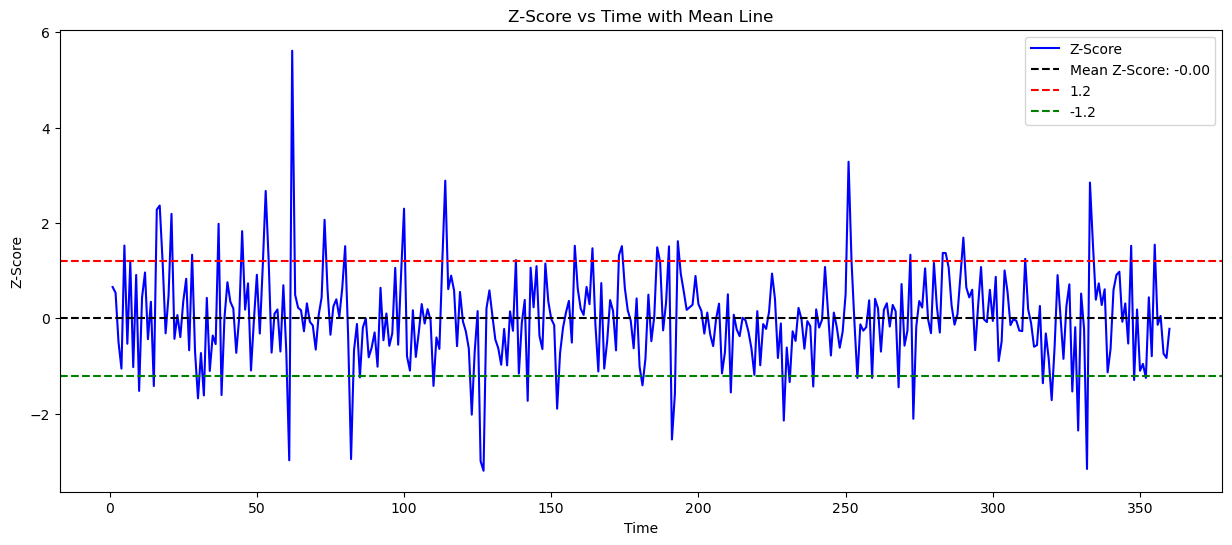

In [6]:
import matplotlib.pyplot as plt

# Create a time axis (use the index of the data for simplicity)
time = np.arange(1, len(z_score) + 1)

# Plot the z-score vs time
plt.figure(figsize=(15, 6))
plt.plot(time, z_score, label="Z-Score", color="blue")
plt.axhline(y=mean, color="black", linestyle="--", label=f"Mean Z-Score: {mean:.2f}")
plt.axhline(1.2, color='red', linestyle='--', label='1.2')
plt.axhline(-1.2, color='green', linestyle='--', label='-1.2')
plt.xlabel("Time")
plt.ylabel("Z-Score")
plt.title("Z-Score vs Time with Mean Line")
plt.legend()

In [7]:
def _set_proper_margin_per_route(self):
    _, beta = utils.calculate_alpha_beta(self.c1[1:], self.c2[1:])

def calculate_alpha_beta(returns1: np.ndarray, returns2: np.ndarray) -> tuple:

    # Add a constant to the independt variable (returns)

    X = sm.add_constant(returns2) # Independent variable
    model = sm.OLS(returns1, X).fit() # Fit the model 
    alpha = model.param[0] # Intercept (alpha)
    beta = model.params[1] # Slope (beta)
    return alpha, beta


In [8]:
# Margin size 

self.shared_vars["margin1"] = self.available_margin * (1 / (1 + beta))
self.shared_vars["margin2"] = self.available_margin * (Beta / (1 + beta))

NameError: name 'self' is not defined